## Experiment tracking with MLFlow

### Data

In [1]:
import pandas as pd

In [2]:
## Dataset link - https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
DATASET = './loan_approval_dataset.csv'

In [6]:
df = pd.read_csv(DATASET)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
from collections import Counter 
import matplotlib.pyplot as plt 
import seaborn as sns 

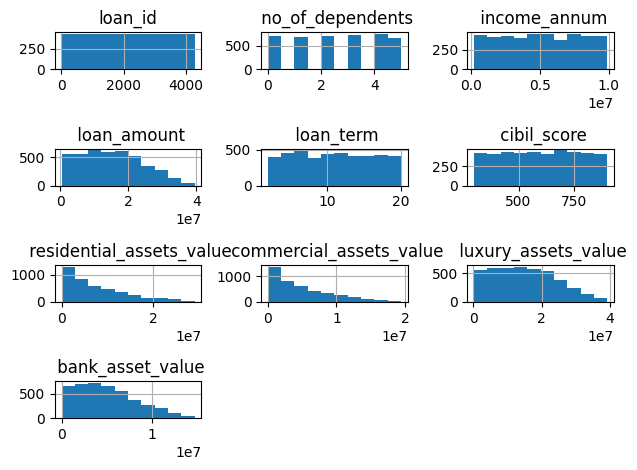

In [8]:
# Most commong tags
df.hist()
# plt.figure(figsize=(40, 22))  # Adjust the width and height as needed
plt.tight_layout()  # Optional: Improve spacing between subplots
plt.show()

In [9]:
# Renaming the column
df = df.rename(columns = {col_name: col_name.strip() for col_name in df.columns}) # Stripping the column name
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [11]:
df['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

### Data Preprocessing

In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
df.loan_status.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [14]:
df_processed = df.copy()

In [15]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'graduate':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['education'] = df_processed['education'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [16]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'approved':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['loan_status'] = df_processed['loan_status'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [17]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'yes':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['self_employed'] = df_processed['self_employed'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


### Feature Engineering

In [ ]:
df_processed['total_asset'] = df_processed['luxury_assets_value'] + df_processed['commercial_assets_value'] + df_processed['residential_assets_value'] 
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_asset
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,42700000
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,13700000
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,44900000
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,44800000
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,50000000


In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
df.loan_status.value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [ ]:
df_processed = df.copy()

In [ ]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'graduate':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['education'] = df_processed['education'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'approved':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['loan_status'] = df_processed['loan_status'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
# One hot encoding 
def convert_to_onehot(x):
    if x.strip().lower() == 'yes':    # 1 - Graduate, 0 Not Graduate    
        return 1 
    return 0 

df_processed['self_employed'] = df_processed['self_employed'].apply(convert_to_onehot)
df_processed.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


### Setting up mlflow

In [ ]:
import mlflow
import os

In [ ]:
experiment_name = "loan approval"
ml_path = os.path.join(os.getcwd(),"mlruns")
mlflow.set_tracking_uri(uri=ml_path)
#  mlflow.set_tracking_uri(uri="http://localhost:8080")
# experiment_id = mlflow.set_experiment(experiment_name).experiment_id 
if not mlflow.get_experiment_by_name(experiment_name):
    experiment_id = mlflow.create_experiment(experiment_name)
else:
    experiment_id = mlflow.get_experiment_by_name(experiment_name).experiment_id
print(experiment_id)

906616594024732302


In [ ]:
mlflow.get_experiment_by_name(experiment_name)

<Experiment: artifact_location='/home/thebeginner86/code/MLOps/ML/mlruns/906616594024732302', creation_time=1732610614245, experiment_id='906616594024732302', last_update_time=1732610614245, lifecycle_stage='active', name='loan approval', tags={}>

In [ ]:
from xgboost import XGBClassifier 
import mlflow 
from sklearn.metrics import accuracy_score
from mlflow.models import infer_signature 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = mlflow.data.from_pandas(
    df_processed, name="Loan Approval Dataset", targets="loan_status"
)

In [ ]:
test_size = 0.2 
train_df, val_df = train_test_split(df_processed, stratify=df.loan_status, test_size=test_size, random_state=1234) 

In [ ]:
X_train = train_df.drop(columns = ['loan_status'], axis = 1) 
y_train = train_df['loan_status']

In [ ]:
X_val = val_df.drop(columns = ['loan_status'], axis = 1) 
y_val = val_df['loan_status']

In [ ]:
xgb_classifier = XGBClassifier(
    n_estimators=10, 
    max_depth=3, 
    learning_rate=1, 
    objective="binary:logistic", 
    random_state=123, 
)


In [ ]:
with mlflow.start_run(experiment_id=experiment_id, run_name="initial experiment"):
    mlflow.log_input(dataset, context="training")
    xgb_classifier.fit(X_train, y_train) 
    clf_params = xgb_classifier.get_xgb_params() 
    mlflow.log_params(clf_params) 
    signature = infer_signature(X_train, xgb_classifier.predict(X_train))   # What is this infer_signature
    model_info = mlflow.xgboost.log_model(
        xgb_classifier, "loan classification", signature=signature
    ) 
    y_pred = xgb_classifier.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    mlflow.log_metric("accuracy", acc)

print("Accuracy achieved: ", acc)


Accuracy achieved:  0.9812646370023419


In [ ]:
xgb_classifier_saved = mlflow.pyfunc.load_model(model_info.model_uri) 
y_pred = xgb_classifier_saved.predict(X_val)

In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [ ]:
acc = accuracy_score(y_val, y_pred)
mlflow.log_metric("accuracy", acc)